# **Plotting Skin Friction *'C<sub>f</sub>'* by Using '*SpalartAllmaras*' Model**

This notebook explains how to plot skin friction *C<sub>f</sub>* along with x-direction for two cases (Turbulent flat plate case with and without wall functions). The procedure is identical to '*PlotCf.ipynb*', but only the turbulence model is different. Here, '*SpalartAllmaras*' model is used, whereas '*kOmegaSST*' model is employed in '*PlotCf.ipynb*'. First of all, related setups are to be established as follows.

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"
sa = "./output/SA/"
!mkdir -p output
!mkdir -p output/SA

## **1. Set Related Variables in Accordance with the Case Data**

In order to simulate the case for various conditions, we need to set related variables (e.g. farfield velocity, kinematic viscosity, model name, yplus, and residual limits). Particularly, *'yp'* and *'res_list'* should be lists, and therefore we can delineate all the related graph in one jupyter notebook. The list *'res_list'* contains all the different limit residuals for **SIMPLE** residual control.

In [2]:
UInf = 69.4
nuInf = 1.388e-05
model = "SpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-3', '1e-4', '1e-5', '1e-6']

## **2. Load Data**
\*.*csv* files that were created during a simulation are loaded to python. For this case, we need to calculate with various residual limits and yp values, and hence *'tauw_path'* should be a list that contains each residual limit value for each yp. In addition, *'.head()'* is used for checking top 5 rows and all columns are well divided.

### 2-1. Turbulent Flat Plate Case with Wall Functions

In [3]:
tauw_path = [run + 'turbulentFlatPlate_SA/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data = [pd.read_csv(tauw_path[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.2797,-0.945080,0
1,0.001458,-21.0275,-0.004824,0
2,0.002433,-16.3174,-0.000953,0
3,0.003410,-14.5430,-0.000415,0
4,0.004390,-13.4873,-0.000264,0


### 2-2. Turbulent Flat Plate Case without Wall Functions

In [4]:
tauw_path_noWallFunc = [run + 'turbulentFlatPlate_SA_noWallFunc/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_noWallFunc = [pd.read_csv(tauw_path_noWallFunc[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_noWallFunc[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.2797,-0.945080,0
1,0.001458,-21.0275,-0.004824,0
2,0.002433,-16.3174,-0.000953,0
3,0.003410,-14.5430,-0.000415,0
4,0.004390,-13.4873,-0.000264,0


## **3. Calculation of *'Re<sub>x</sub>'* and *'C<sub>f</sub>'***

*'Re<sub>x</sub>'* should be calculated for x-axis, and *'C<sub>f</sub>'* is to be found for y-axis. This simulation case is incompressible, and thus only the kinematic viscosity is used. *'Re<sub>x</sub>'* needs not to be a list since the coordinates of the cell centers are the same, whereras *'C<sub>f</sub>'* is a list.

### 3-1. Turbulent Flat Plate Case with Wall Functions

In [5]:
x0 = 0
Rex = (tauw_data[0]['ccx'] - x0)*UInf/nuInf
Cf = [np.sqrt(tauw_data[i + len(res_list)*j]['tau_xx']**2 + tauw_data[i + len(res_list)*j]['tau_yy']**2 + tauw_data[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

### 3-2. Turbulent Flat Plate Case without Wall Functions

Here, '*Re<sub>x</sub>*' and '*x<sub>0</sub>*' are the same for these two cases, and thus only the skin friction needs to be calculated for this case.

In [6]:
Cf_noWallFunc = [np.sqrt(tauw_data_noWallFunc[i + len(res_list)*j]['tau_xx']**2 + tauw_data_noWallFunc[i + len(res_list)*j]['tau_yy']**2 + tauw_data_noWallFunc[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

## **4. Wieghardt's Equation**

*Wieghardt's equation* is to be calculated in order to be compared to simulation.

In [7]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

## **5. Plot**

Skin friction *'C<sub>f</sub>'* is plotted along with *'Re<sub>x</sub>'*.

### 5-1. Turbulent Flat Plate Case with Wall Functions

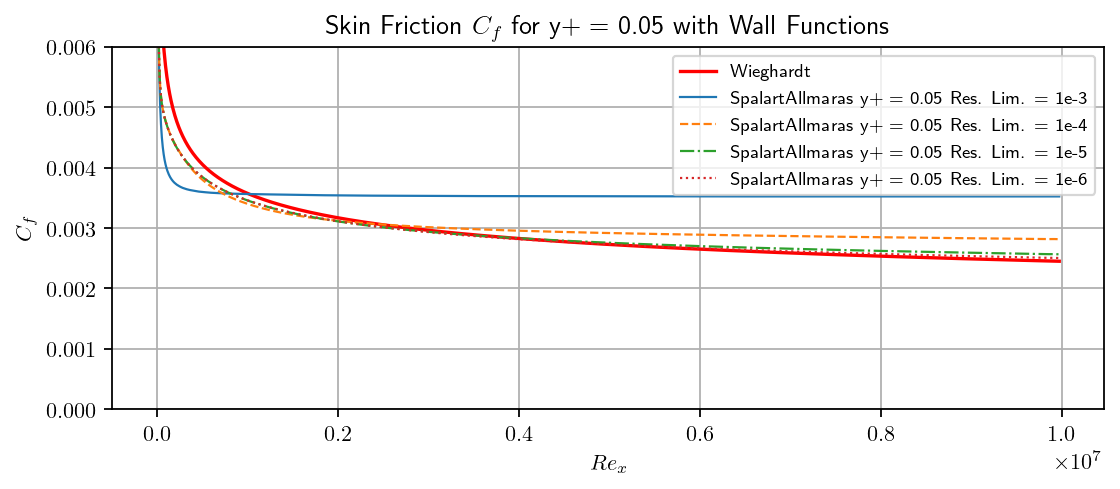

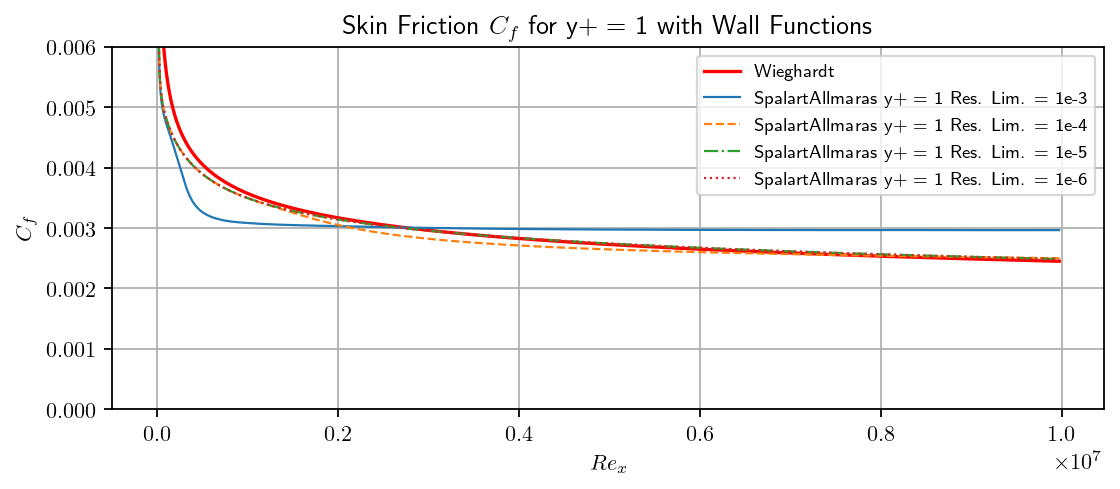

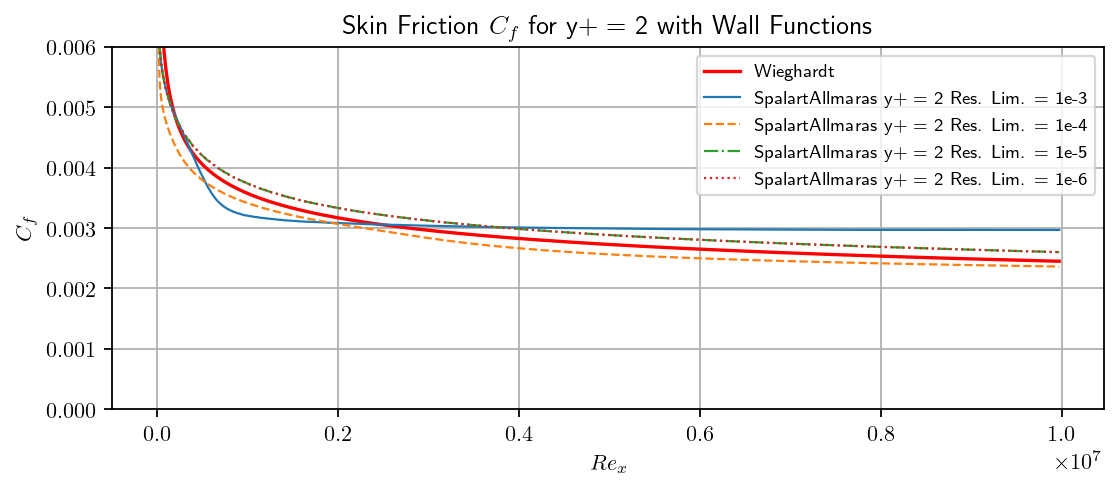

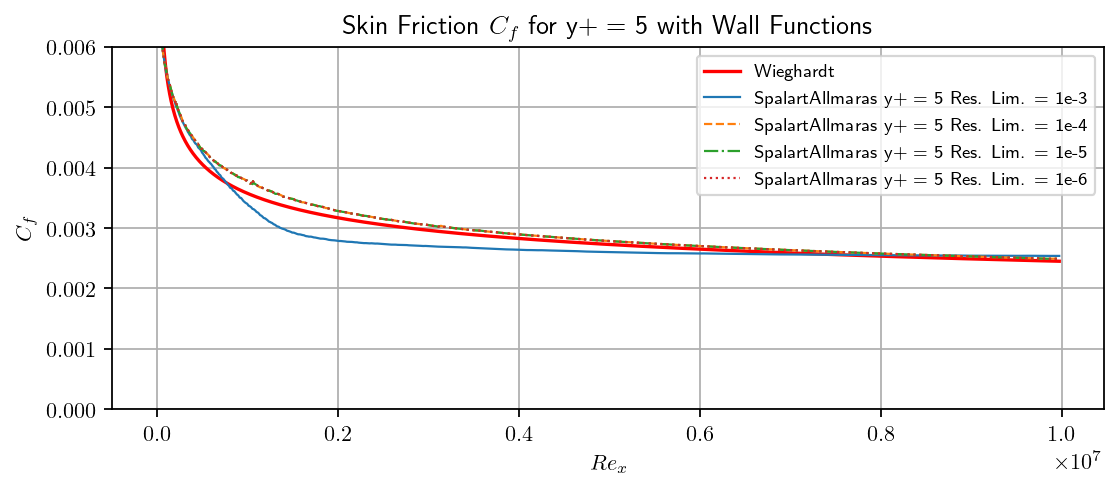

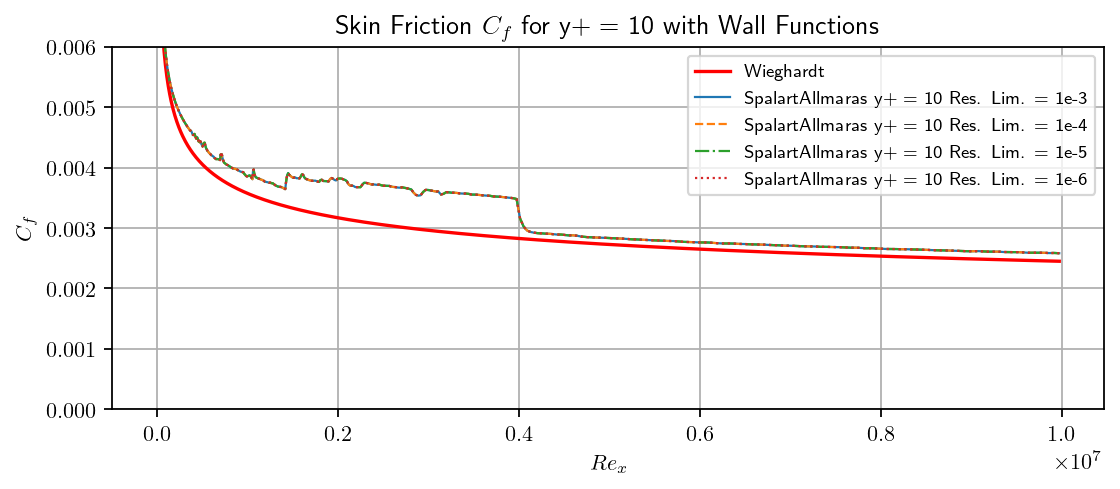

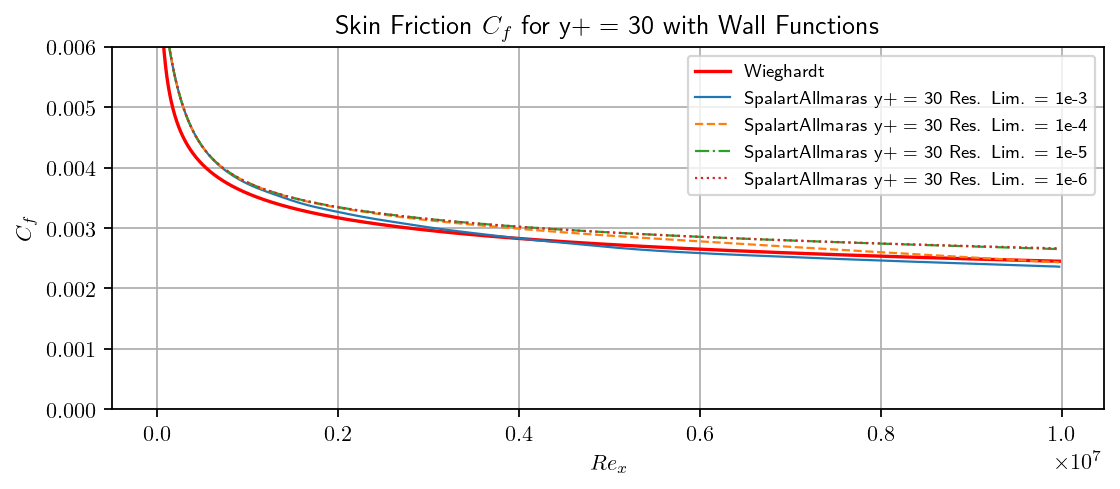

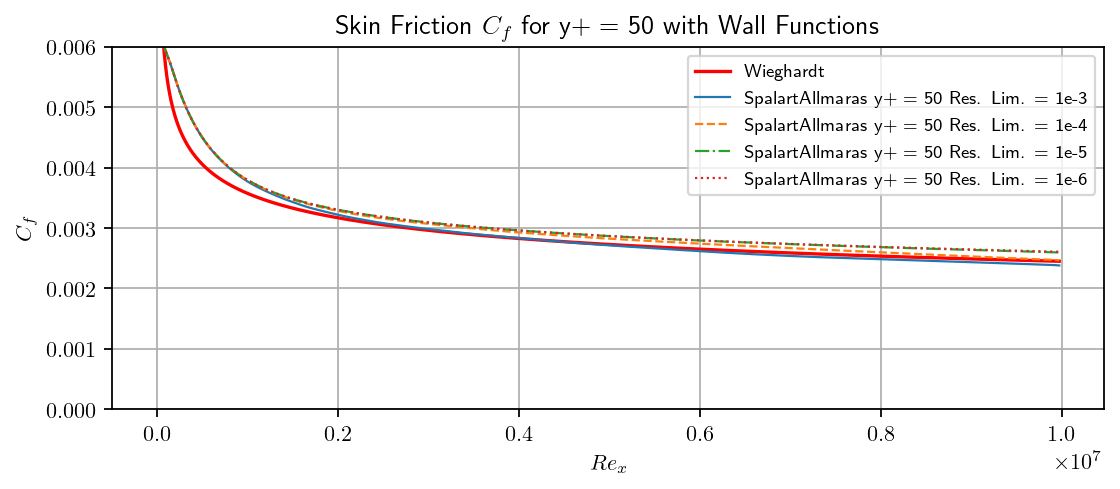

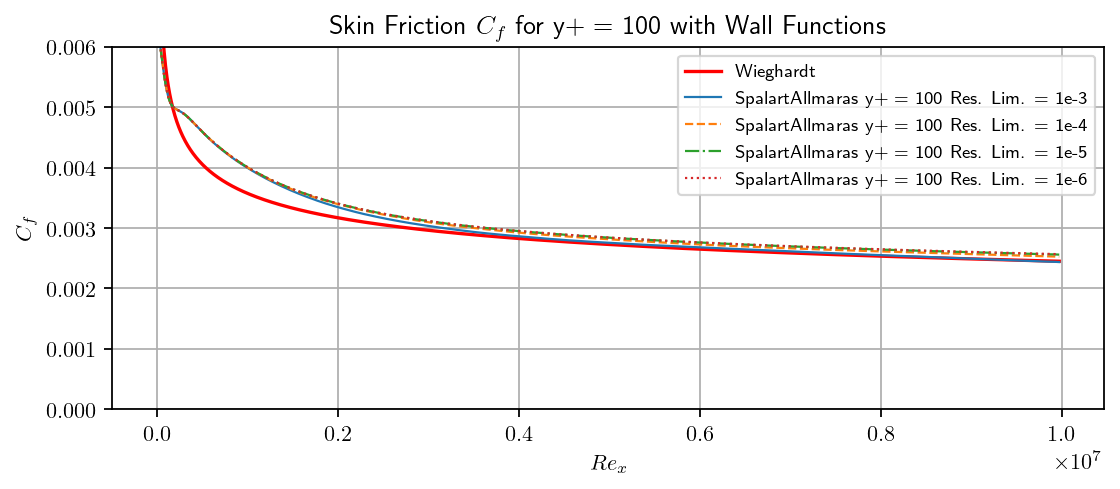

In [8]:
style = ["-", "--", "-.", ":"]
lw = 1.0
for j in range(len(yp)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax.set_xlabel(r"$Re_x$")
    ax.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for y+ = {} with Wall Functions".format(yp[j]))
    ax.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
    for i in range(len(res_list)):
        ax.plot(Rex, Cf[i + len(res_list)*j], label = "{} y+ = {} Res. Lim. = {}".format(model, yp[j], res_list[i]), ls = style[i], c = "C{:d}".format(i), lw = lw)
        ax.legend(fontsize = 8)
    plt.savefig(sa + "tauw_yp{}_{}_withWallFunc.pdf".format(yp[j], model), bbox_inches="tight")

### 5-2. Turbulent Flat Plate Case without Wall Functions

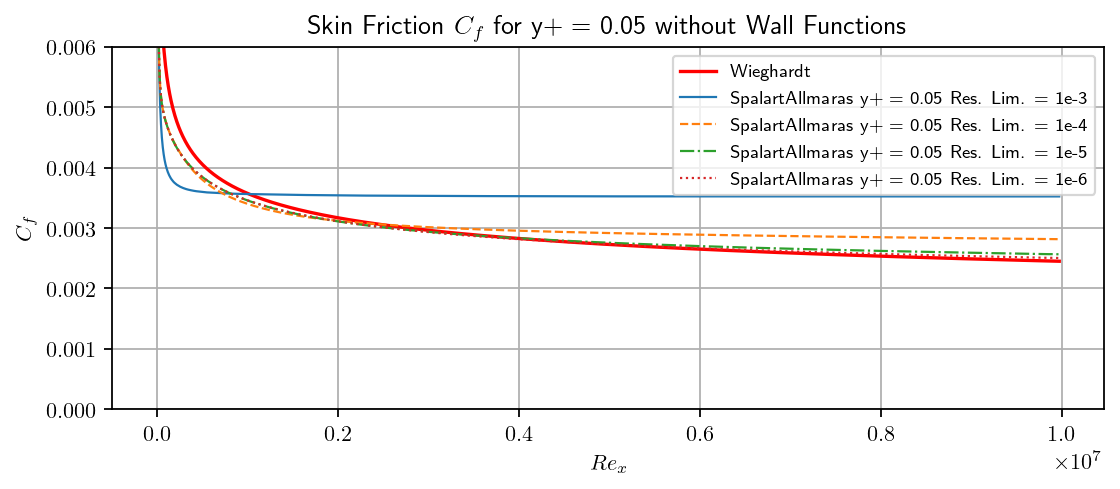

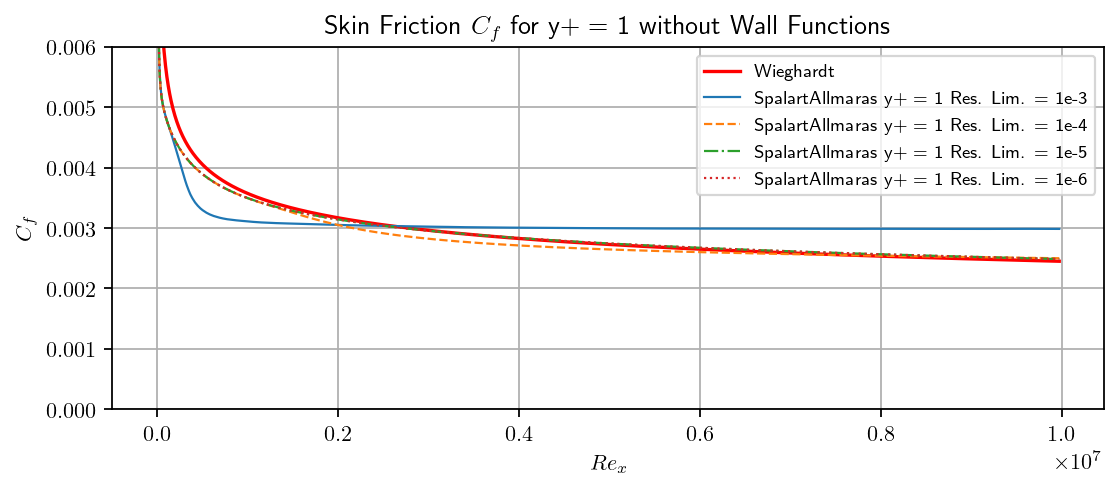

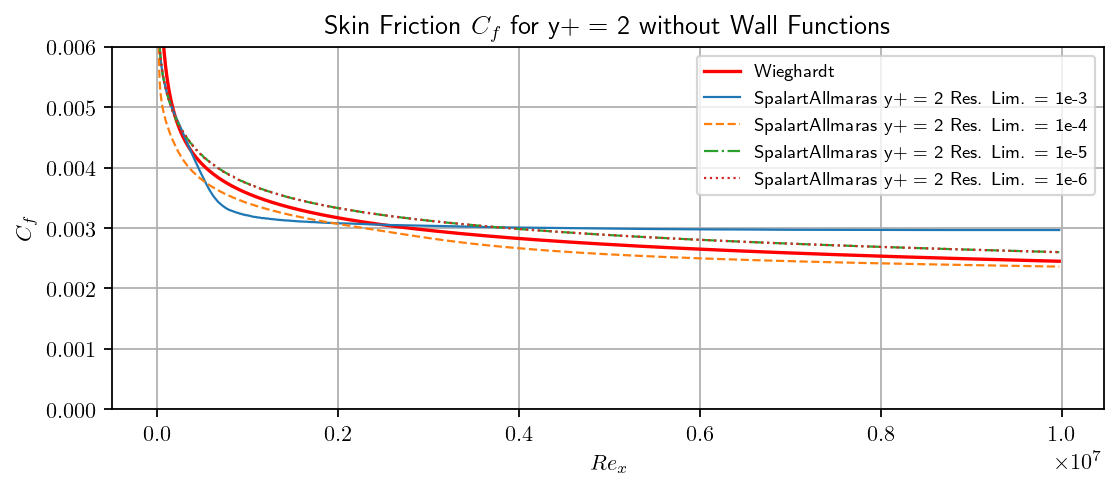

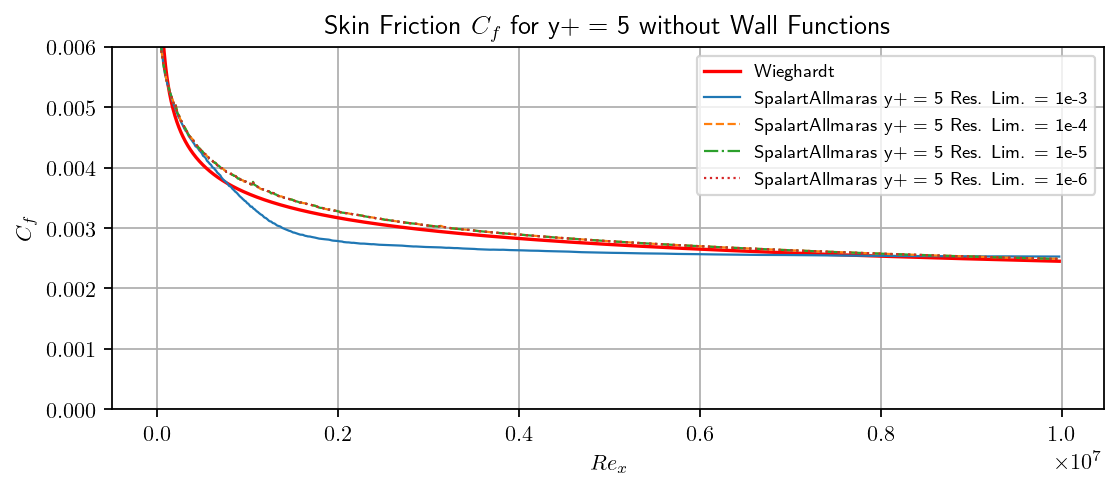

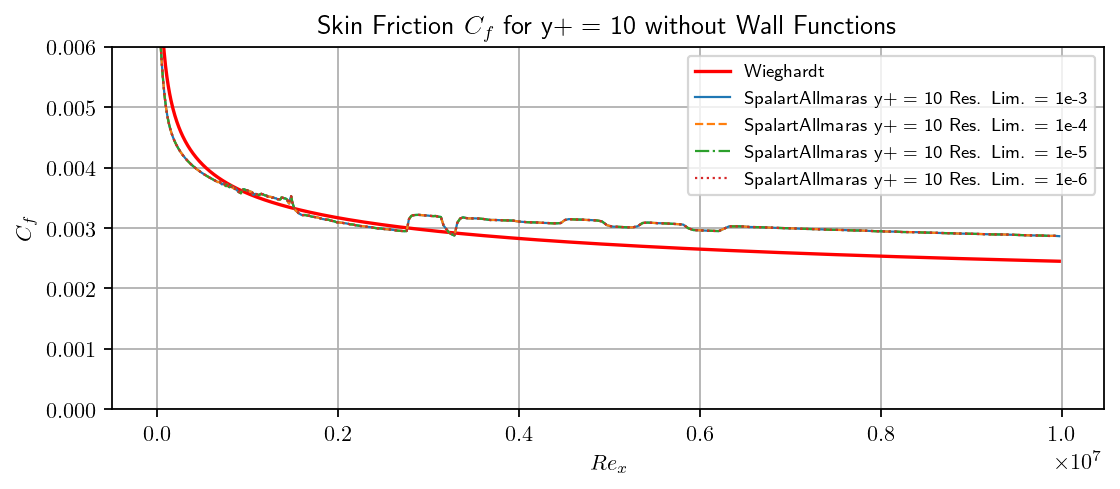

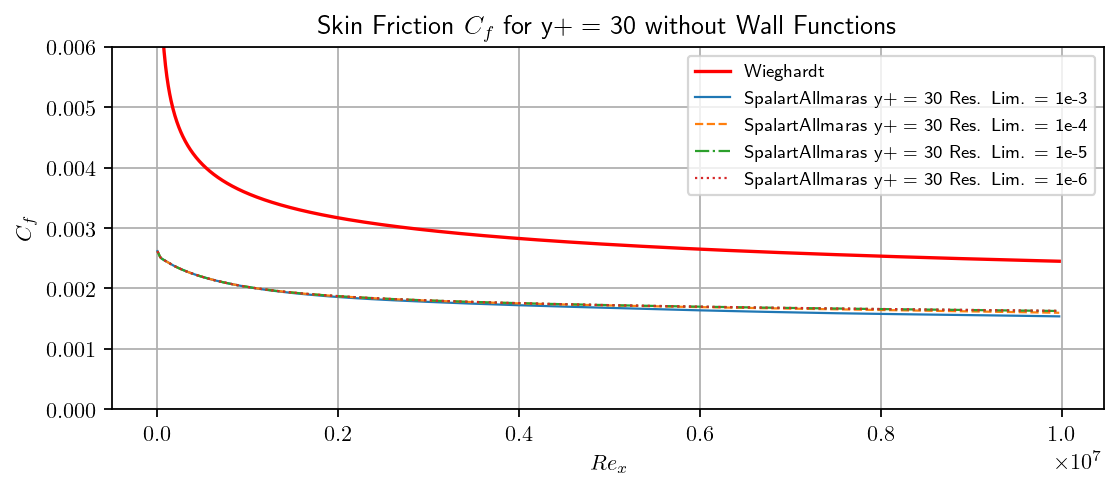

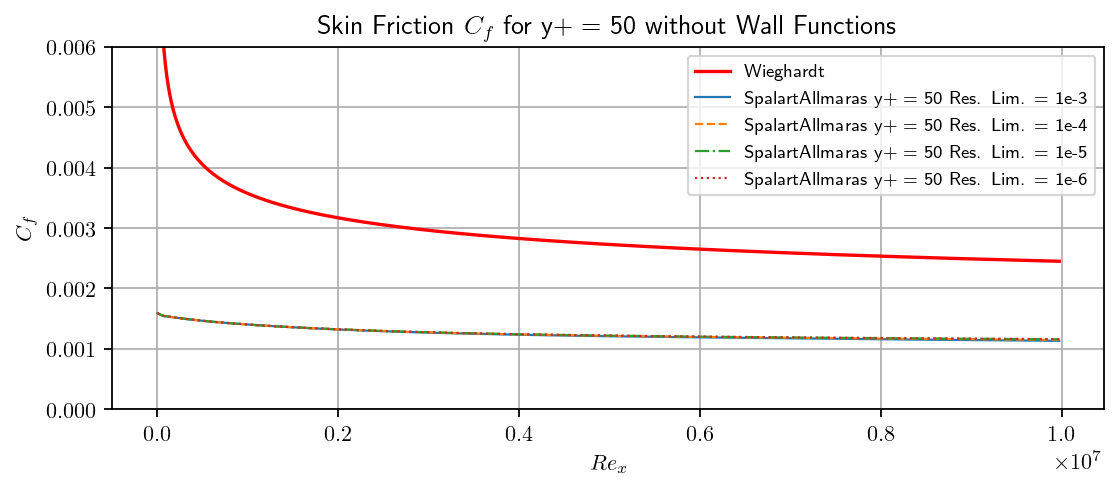

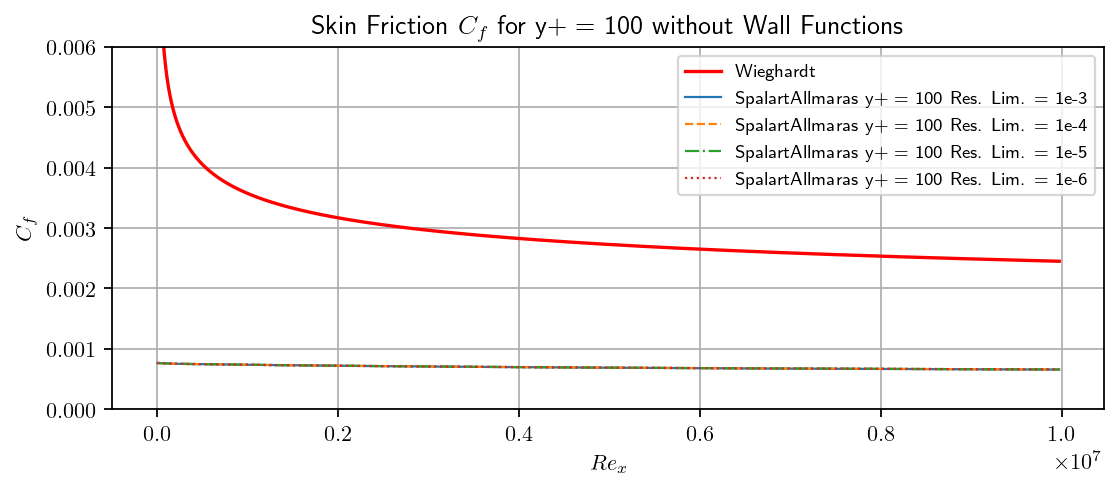

In [9]:
style2 = ["-", "--", "-.", ":"]
lw2 = 1.0
for j in range(len(yp)):
    fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax2.set_xlabel(r"$Re_x$")
    ax2.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for y+ = {} without Wall Functions".format(yp[j]))
    ax2.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
    for i in range(len(res_list)):
        ax2.plot(Rex, Cf_noWallFunc[i + len(res_list)*j], label = "{} y+ = {} Res. Lim. = {}".format(model, yp[j], res_list[i]), ls = style2[i], c = "C{:d}".format(i), lw = lw2)
        ax2.legend(fontsize = 8)
    plt.savefig(sa + "tauw_yp{}_{}_noWallFunc.pdf".format(yp[j], model), bbox_inches="tight")